# 🧪 Group Analysis - AP Usage by Building Code
Este notebook carga muestras de Access Points y Clientes desde `samples/anonymized` y agrupa el uso de APs por código de edificio (por ejemplo `AP-CEDU33` → `CEDU`).

## 1. Importar Librerías y Utilidades
Incluye pandas, numpy, matplotlib y seaborn, igual que el starter kit.

In [15]:
# Imports base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid', palette='pastel')
plt.rcParams.update({
    'figure.figsize': (12, 6),
    'axes.titlesize': 18,
    'axes.labelsize': 14
})

# Asegurar que el path a utilidades esté disponible (starter_kits/utils)
import sys, os
UTILS_PATH = Path('../starter_kits/utils').resolve()
if str(UTILS_PATH) not in sys.path:
    sys.path.append(str(UTILS_PATH))
from data_loader import load_multiple_files, AP_NAME_PATTERN

print('✅ Librerías y utilidades cargadas correctamente')

✅ Librerías y utilidades cargadas correctamente


## 2. Cargar Access Points (APs)
Se cargan todos los JSON en `samples/anonymized/ap`.

In [10]:
ap_dir = Path('../samples/anonymized/ap')
df_aps = load_multiple_files(ap_dir, max_files=None, verbose=True)
print(f"\nColumns APs: {list(df_aps.columns)}")
df_aps.head()

📁 Encontrados 1 archivos en ../samples/anonymized/ap
📊 Cargando todos archivos...
✅ Cargados 1169 registros de 1 archivos
💾 Memoria: 1.56 MB

Columns APs: ['ap_deployment_mode', 'ap_group', 'client_count', 'cluster_id', 'controller_name', 'cpu_utilization', 'firmware_version', 'gateway_cluster_id', 'gateway_cluster_name', 'group_name', 'ip_address', 'labels', 'last_modified', 'macaddr', 'mem_free', 'mem_total', 'mesh_role', 'model', 'name', 'notes', 'public_ip_address', 'radios', 'serial', 'site', 'sleep_status', 'status', 'subnet_mask', 'swarm_id', 'swarm_master', 'swarm_name', 'uptime', 'down_reason']


,ap_deployment_mode,ap_group,client_count,cluster_id,controller_name,cpu_utilization,firmware_version,gateway_cluster_id,gateway_cluster_name,group_name,...,serial,site,sleep_status,status,subnet_mask,swarm_id,swarm_master,swarm_name,uptime,down_reason
0,IAP,None,4,,,8,10.6.0.3_90581,82,auto_group_229,Bellaterra,...,AP_ea4f8dd0b2e0,UAB,False,Up,255.255.248.0,,False,AP-VET71,3867941,NaN
1,IAP,None,0,,,12,10.6.0.3_90581,,,Bellaterra,...,AP_e5c7d5048a2f,UAB,False,Down,255.255.252.0,,False,AP-EXTBIBHUM01,0,Access Point disconnected from Aruba Central
2,IAP,None,1,,,6,10.6.0.3_90581,82,auto_group_229,Bellaterra,...,AP_bb7eae2933c9,UAB,False,Up,255.255.224.0,,False,AP-LLET32,978647,NaN
3,IAP,None,0,,,4,10.6.0.3_90581,,,Bellaterra,...,AP_b1da6b0a4503,UAB,False,Up,255.255.255.0,,False,AP-GTIP12,287524,NaN
4,IAP,None,4,,,9,10.6.0.3_90581,,,Bellaterra,...,AP_15316f125c98,UAB,False,Up,255.255.248.0,,False,AP-DRET14,633795,NaN


## 3. Cargar Clientes
Se carga la muestra de clientes en `samples/anonymized/clients`.

In [11]:
clients_dir = Path('../samples/anonymized/clients')
df_clients = load_multiple_files(clients_dir, max_files=None, verbose=True)
print(f"\nColumns Clients: {list(df_clients.columns)}")
df_clients.head()

📁 Encontrados 1 archivos en ../samples/anonymized/clients
📊 Cargando todos archivos...
✅ Cargados 10487 registros de 1 archivos
💾 Memoria: 18.82 MB

Columns Clients: ['associated_device', 'associated_device_mac', 'associated_device_name', 'authentication_type', 'band', 'channel', 'client_category', 'client_type', 'connected_device_type', 'connection', 'encryption_method', 'failure_stage', 'gateway_serial', 'group_id', 'group_name', 'health', 'hostname', 'ht_type', 'ip_address', 'label_id', 'labels', 'last_connection_time', 'macaddr', 'manufacturer', 'maxspeed', 'name', 'network', 'os_type', 'phy_type', 'radio_mac', 'radio_number', 'signal_db', 'signal_strength', 'site', 'snr', 'speed', 'swarm_id', 'user_role', 'username', 'vlan', 'failure_reason', 'usage']


,associated_device,associated_device_mac,associated_device_name,authentication_type,band,channel,client_category,client_type,connected_device_type,connection,...,signal_strength,site,snr,speed,swarm_id,user_role,username,vlan,failure_reason,usage
0,AP_8e2d9933ec92,AP_5cdc80c05afc,AP-CEDU26,MAC Authentication,5.0,100 (20 MHz),SmartDevice,WIRELESS,AP,"802.11ac, 802.11k, 802.11v",...,5.0,UAB,41.0,96.0,,conv_authenticad,USER_87e3ddea248c,VLAN_A,NaN,NaN
1,AP_f6e291deb8b9,AP_b509bd7bc558,AP-VET49,MAC Authentication,2.4,1 (20 MHz),Computer,WIRELESS,AP,NaN,...,5.0,UAB,58.0,24.0,,conv_authenticad,USER_94894477ff4b,VLAN_A,NaN,NaN
2,AP_f135b46ace66,AP_bdcd660fb897,AP-LLET40,MAC Authentication,2.4,1 (20 MHz),SmartDevice,WIRELESS,AP,"802.11gn, 802.11k, 802.11v",...,NaN,UAB,NaN,NaN,NaN,conv_authenticad,USER_251550f3a134,VLAN_A,NaN,NaN
3,AP_64ab3911a02b,AP_caa532653671,AP-CIEN63,MAC Authentication,2.4,6 (20 MHz),SmartDevice,WIRELESS,AP,"802.11gn, 802.11k, 802.11v",...,3.0,UAB,20.0,2.0,,conv_authenticad,USER_267e2297f382,VLAN_A,NaN,NaN
4,AP_e9d5de9a89cf,AP_a2bc3e3cbd64,AP-ECOSOC13,MAC Authentication,2.4,11 (20 MHz),SmartDevice,WIRELESS,AP,"802.11ax, 802.11k, 802.11v",...,5.0,UAB,54.0,258.0,,conv_authenticad,USER_637b9930250b,VLAN_A,NaN,NaN


## 4. Uso de APs Agrupado por Código de Edificio
Extraemos el código entre `AP-` y los dígitos finales y agregamos el uso (número de clientes asociados / registros).

In [12]:
# Verificar que tenemos la columna con el nombre del AP en df_clients
ap_name_col_candidates = [c for c in df_clients.columns if 'associated' in c and 'device' in c and 'name' in c]
if not ap_name_col_candidates:
    raise ValueError('No se encontró columna con nombre del AP (associated_device_name)')
ap_name_col = ap_name_col_candidates[0]

# Extraer código de edificio usando el patrón AP-([A-Z]+)(\d+) y sumar usos
pattern = re.compile(AP_NAME_PATTERN)

def extract_building(code: str) -> str:
    if not isinstance(code, str):
        return 'UNKNOWN'
    m = pattern.match(code)
    return m.group(1) if m else 'UNKNOWN'

# Calcular agregación
df_clients['building_code'] = df_clients[ap_name_col].apply(extract_building)
usage_by_building = (
    df_clients.groupby('building_code')
              .size()
              .reset_index(name='total_connections')
              .sort_values('total_connections', ascending=False)
)

print('🏢 Uso agregado por código de edificio:')
usage_by_building

🏢 Uso agregado por código de edificio:


,building_code,total_connections
9,CIEN,1461
33,LLET,1360
8,CEDU,699
14,DRET,683
46,VET,634
22,ETSE,583
34,MED,354
25,FTI,349
27,HEMER,316
5,BIBSOC,287


### 4.1 Visualización (Barh) del Uso por Código de Edificio

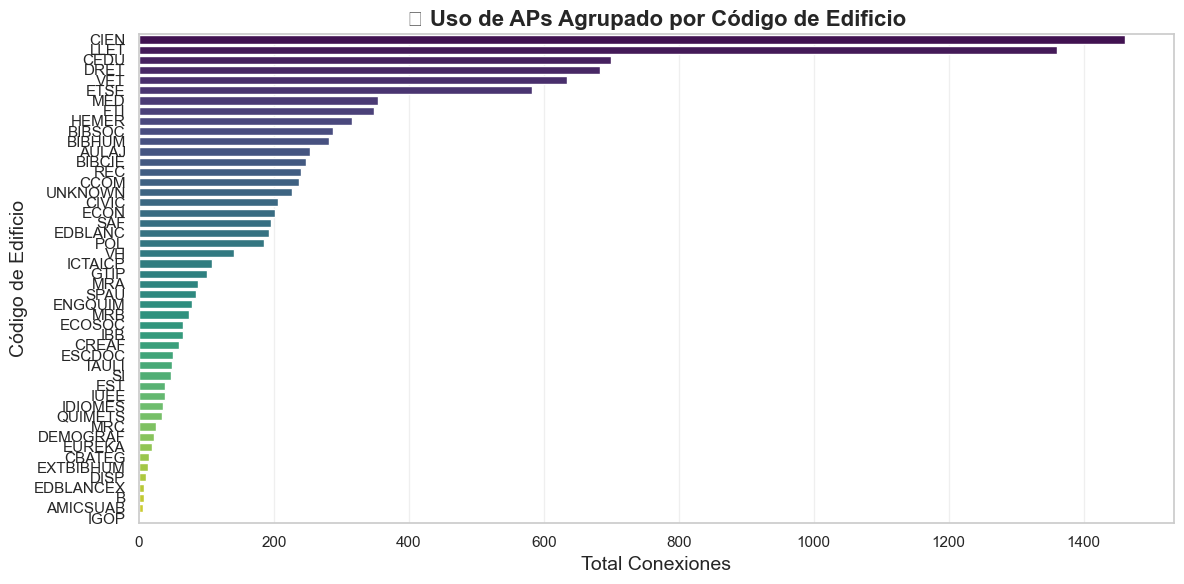

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(data=usage_by_building, x='total_connections', y='building_code', orient='h', palette='viridis')
plt.title('📡 Uso de APs Agrupado por Código de Edificio', fontsize=16, fontweight='bold')
plt.xlabel('Total Conexiones')
plt.ylabel('Código de Edificio')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()